In [1]:
# system stuff
import sys
sys.path.append("..")
import datetime

# galpy stuff
from galpy.potential import MiyamotoNagaiPotential, NFWPotential, HernquistPotential
from galpy.actionAngle import estimateDeltaStaeckel, actionAngleStaeckel
from galpy.actionAngle import UnboundError

# auriga stuff
from areposnap.gadget import gadget_readsnap
from areposnap.gadget_subfind import load_subfind

from auriga_basics import *
from auriga_functions import *

# main packages stuff
import numpy as np
from scipy import stats

# python stuff
import random
import copy

# plot stuff
from IPython.display import Image, display
import corner

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Circle
from matplotlib import animation
from matplotlib.colors import LogNorm
from matplotlib import rcParams
from matplotlib import colors

%matplotlib inline

rcParams['font.size'] = 16
rcParams['lines.linewidth'] = 1.5
rcParams['axes.linewidth'] = 1.5
rcParams['ytick.major.width'] = 1.5
rcParams['xtick.major.width'] = 1.5
rcParams['image.cmap'] = 'magma'

cmap = copy.copy(plt.cm.get_cmap(rcParams['image.cmap']))
cmap.set_bad((0,0,0))

# display stuff
%config InlineBackend.figure_format = 'retina'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [4]:
# Simulation relevant stuff
machine = 'virgo'
if machine == 'magny':
    basedir = "/hits/universe/GigaGalaxy/level4_MHD/"
    filedir = "/home/extmilan/masterthesis/files/"
    plotdir = "/home/extmilan/masterthesis/plots/"
elif machine == 'mac': 
    basedir = "/Users/smilanov/Desktop/Auriga/level4/"
    filedir = "/Users/smilanov/Documents/masterthesis/auriga_files/files/"
    plotdir = "/Users/smilanov/Documents/masterthesis/auriga_files/plots/"
elif machine == 'virgo': 
    basedir = "/virgo/simulations/Auriga/level4_MHD/"
    filedir = "/u/milas/masterthesis/masterproject/files/"
    plotdir = "/u/milas/masterthesis/masterproject/plots/"
    

In [7]:
# load potential parameters
R0_kpc_all, v0_kms_all, a_MND_kpc_all, b_MND_kpc_all, a_NFWH_kpc_all, a_HB_kpc_all, v0_MND_kms_all, v0_NFWH_kms_all, v0_HB_kms_all = np.loadtxt(filedir + 'potential/fitted_potential_params_dec18.txt')

n_MND  = v0_MND_kms_all**2  / v0_kms_all**2
n_NFWH = v0_NFWH_kms_all**2 / v0_kms_all**2
n_HB   = v0_HB_kms_all**2   / v0_kms_all**2

In [14]:
def setup_galpy_potential(a_MND_kpc, b_MND_kpc, a_NFWH_kpc, a_HB_kpc, n_MND, n_NFWH, n_HB, _REFR0_kpc):
    
    #test input:
    if (a_MND_kpc <= 0.) or (b_MND_kpc <= 0.) or (a_NFWH_kpc <= 0.) or (a_HB_kpc <= 0.) \
       or (n_MND <= 0.) or (n_NFWH <= 0.) or (n_HB <= 0.) or (n_MND >= 1.) or (n_NFWH >= 1.) or (n_HB >= 1.):
        raise ValueError('Error in setup_galpy_potential: '+\
                         'The input parameters for the scaling profiles do not correspond to a physical potential.')
    if np.fabs(n_MND + n_NFWH + n_HB - 1.) > 1e-2:
        raise ValueError('Error in setup_galpy_potential: '+\
                         'The sum of the normalization does not add up to 1.')
        
    #trafo to galpy units:
    a_MND  = a_MND_kpc  / _REFR0_kpc
    b_MND  = b_MND_kpc  / _REFR0_kpc
    a_NFWH = a_NFWH_kpc / _REFR0_kpc
    a_HB   = a_HB_kpc   / _REFR0_kpc
    
    #setup potential:
    disk = MiyamotoNagaiPotential(
                a = a_MND,
                b = b_MND,
                normalize = n_MND)
    halo = NFWPotential(
                a = a_NFWH,
                normalize = n_NFWH)
    bulge = HernquistPotential(
                a = a_HB,
                normalize = n_HB) 
     
    return [disk,halo,bulge]

level   : 4
halo    : 24
snapnr  : 127
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1783163 stars.
Rotated pos.
Rotated vel.

galrad  : 0.02408556640148163
redshift: 2.220446049250313e-16
time    : 0.9999999999999998
center  : [ 0.  0.  0.]

Number of GCs: 84656.
Sum of normalizations after fitting potential parameters: 0.9917747699732942.
22:14:52.339864
0
22:15:15.314761
1000
22:15:39.344815
2000
22:16:03.397310
3000
22:16:27.269810
4000
22:16:48.147201
5000
22:17:09.016624
6000
22:17:32.024488
7000
22:17:56.024934
8000
22:18:19.969185
9000
22:18:43.835583
10000
22:19:05.529733
11000
22:19:26.868116
12000
22:19:50.352362
13000
22:20:13.924143
14000
22:20:38.010753
15000
22:21:02.161345
16000
22:21:23.538220
17000
22:21:44.806707
18000
22:22:07.802615
19000
22:22:31.604974
20000
22:22:55.573390
21000
22:23:19.722360
22000
22:23:41.501229
23000
22:24:02.54898

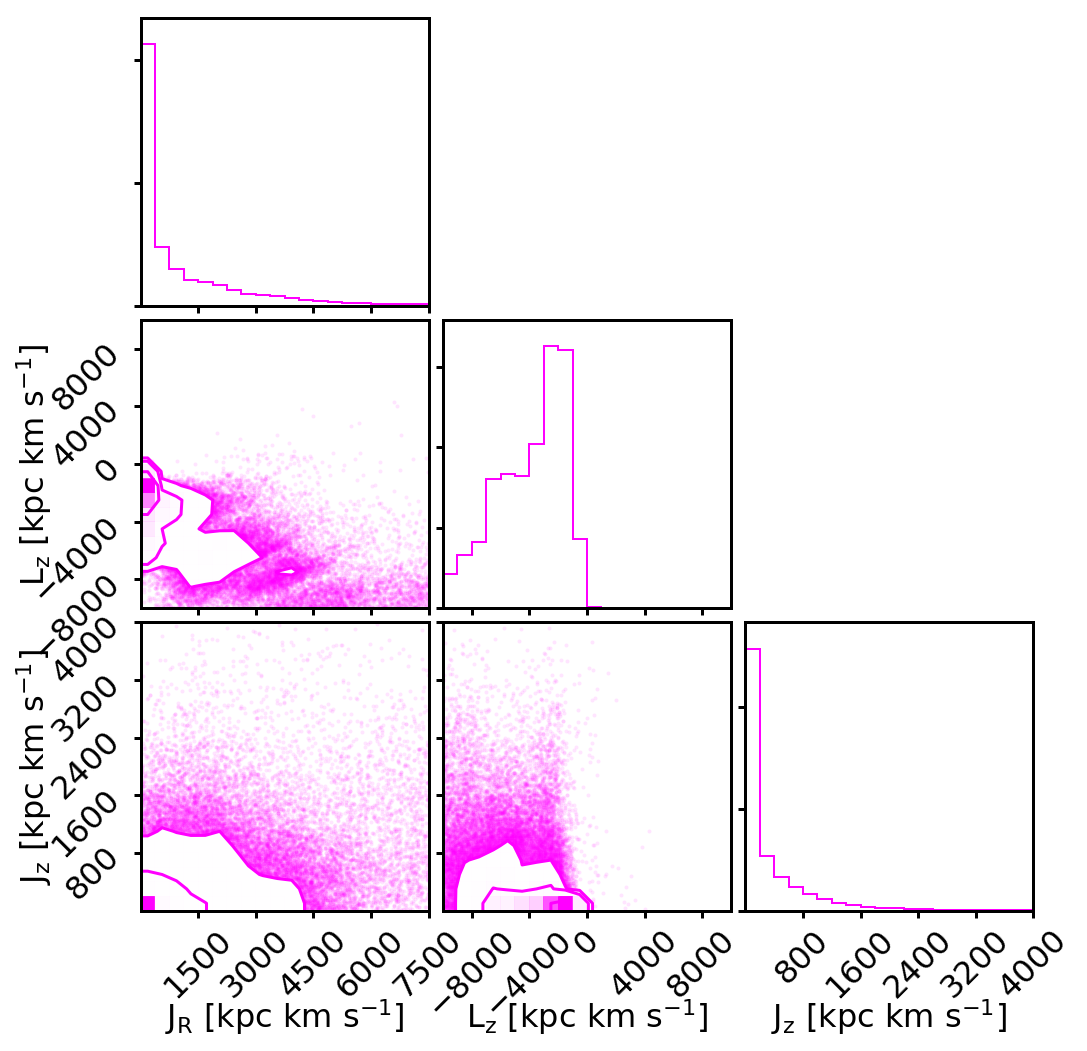

level   : 4
halo    : 24
snapnr  : 126
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1774142 stars.
Rotated pos.
Rotated vel.

galrad  : 0.023996514081954957
redshift: 0.009521666967944764
time    : 0.99056814006128
center  : [ 0.  0.  0.]

Number of GCs: 84656.
Sum of normalizations after fitting potential parameters: 0.9942731484862422.
22:48:48.530128
0
22:49:12.060475
1000
22:49:35.557928
2000
22:49:58.715788
3000
22:50:19.738754
4000
22:50:41.218037
5000
22:51:02.953093
6000
22:51:27.076507
7000
22:51:50.922988
8000
22:52:14.712223
9000
22:52:35.975790
10000
22:52:57.057958
11000
22:53:20.195566
12000
22:53:43.729486
13000
22:54:07.420174
14000
22:54:31.044491
15000
22:54:52.821871
16000
22:55:13.745662
17000
22:55:36.765721
18000
22:55:59.919686
19000
22:56:23.206266
20000
22:56:46.492419
21000
22:57:09.228542
22000
22:57:30.154595
23000
22:57:51.552605


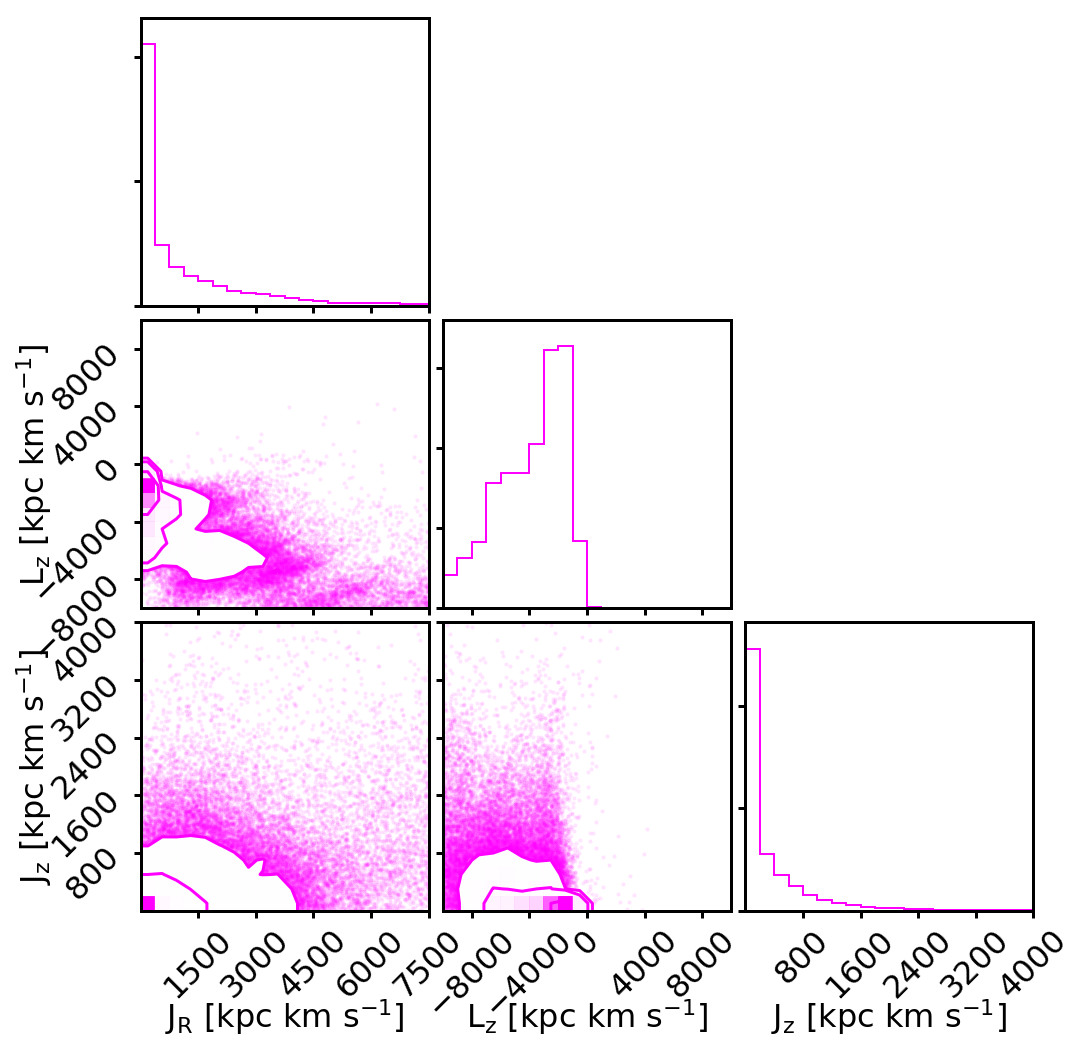

level   : 4
halo    : 24
snapnr  : 125
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1769475 stars.
Rotated pos.
Rotated vel.

galrad  : 0.023806245625019075
redshift: 0.023974428382762536
time    : 0.9765868876036025
center  : [ 0.  0.  0.]

Number of GCs: 84656.
Sum of normalizations after fitting potential parameters: 0.996948432410443.
23:17:20.320688
0
23:17:41.226851
1000
23:18:02.132378
2000
23:18:21.178320
3000
23:18:22.185055
4000
23:18:33.196293
5000
23:18:40.023574
6000
23:18:52.090945
7000
23:19:06.800065
8000
23:19:27.660819
9000
23:19:48.549557
10000
23:20:09.403392
11000
23:20:30.372923
12000
23:20:51.263742
13000
23:21:12.208466
14000
23:21:33.289999
15000
23:21:54.189126
16000
23:22:15.097484
17000
23:22:35.931531
18000
23:22:56.784673
19000
23:23:17.634638
20000
23:23:38.509893
21000
23:23:51.946590
22000
23:23:59.271868
23000
23:24:09.861696

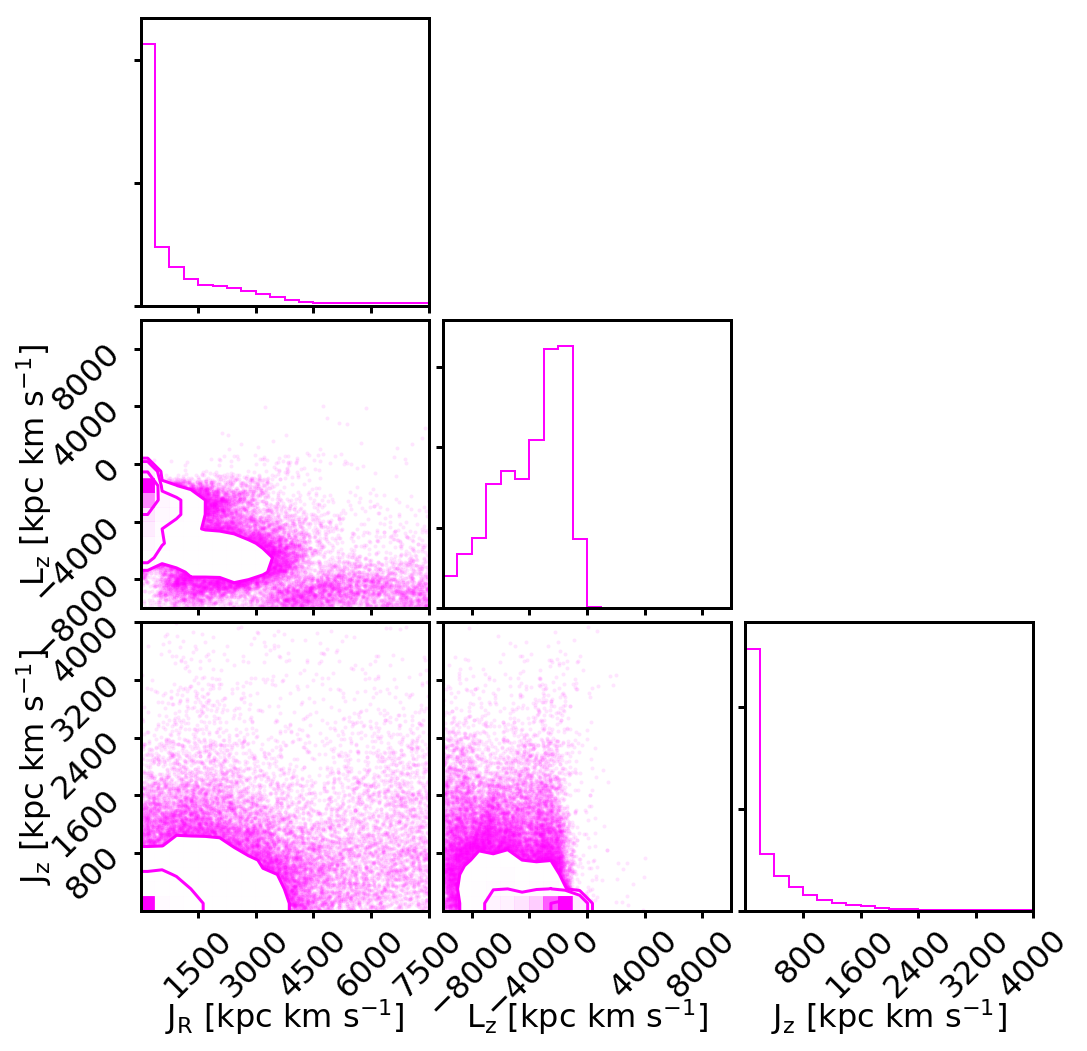

level   : 4
halo    : 24
snapnr  : 124
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1758643 stars.
Rotated pos.
Rotated vel.

galrad  : 0.02354053109884262
redshift: 0.0337243718735154
time    : 0.9673758568617342
center  : [ 0.  0.  0.]

Number of GCs: 84656.
Sum of normalizations after fitting potential parameters: 0.9981292613146733.
23:43:26.363964
0
23:43:47.611610
1000
23:44:08.683665
2000
23:44:29.833234
3000
23:44:50.923047
4000
23:45:11.949435
5000
23:45:33.071892
6000
23:45:54.219690
7000
23:46:13.705571
8000
23:46:28.916988
9000
23:46:32.096072
10000
23:46:46.640112
11000
23:46:50.136117
12000
23:47:11.204840
13000
23:47:32.198992
14000
23:47:53.251866
15000
23:48:14.383102
16000
23:48:35.437011
17000
23:48:56.454341
18000
23:49:17.635847
19000
23:49:38.711230
20000
23:49:59.751150
21000
23:50:20.871014
22000
23:50:41.916628
23000
23:51:02.974764
2

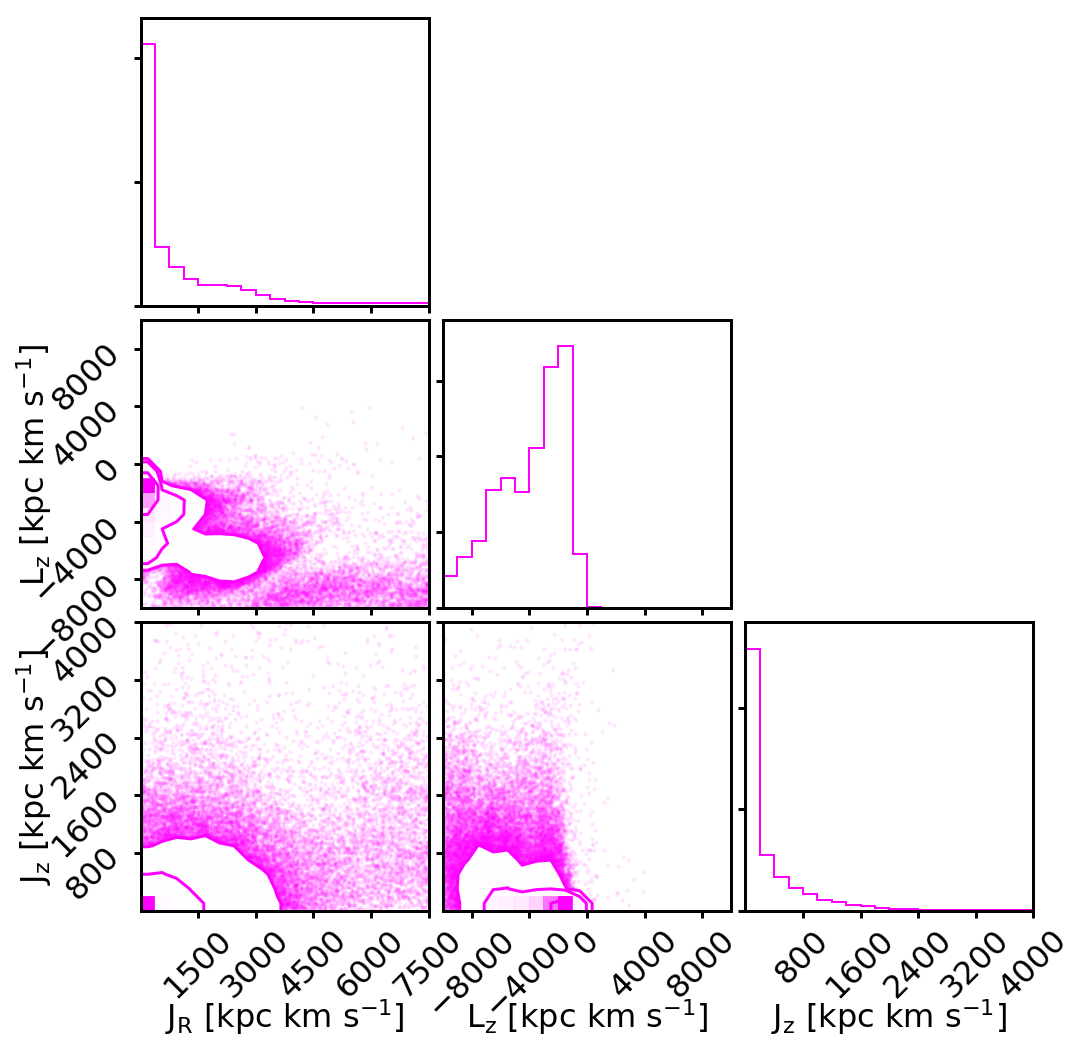

level   : 4
halo    : 24
snapnr  : 123
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1755878 stars.
Rotated pos.
Rotated vel.

galrad  : 0.02335823625326157
redshift: 0.04852362998180593
time    : 0.9537219490392906
center  : [ 0.  0.  0.]

Number of GCs: 84656.
Sum of normalizations after fitting potential parameters: 0.9991732806544532.
00:08:15.420875
0
00:08:36.023921
1000
00:08:53.255205
2000
00:08:54.415366
3000
00:08:55.404822
4000
00:08:56.317735
5000
00:08:57.542780
6000
00:09:05.866851
7000
00:09:13.506293
8000
00:09:17.060381
9000
00:09:20.639217
10000
00:09:32.750618
11000
00:09:39.522763
12000
00:10:00.428871
13000
00:10:20.963691
14000
00:10:41.202445
15000
00:11:02.090496
16000
00:11:22.995347
17000
00:11:43.847384
18000
00:12:04.836854
19000
00:12:25.776547
20000
00:12:46.683970
21000
00:13:07.593446
22000
00:13:28.464411
23000
00:13:48.956387


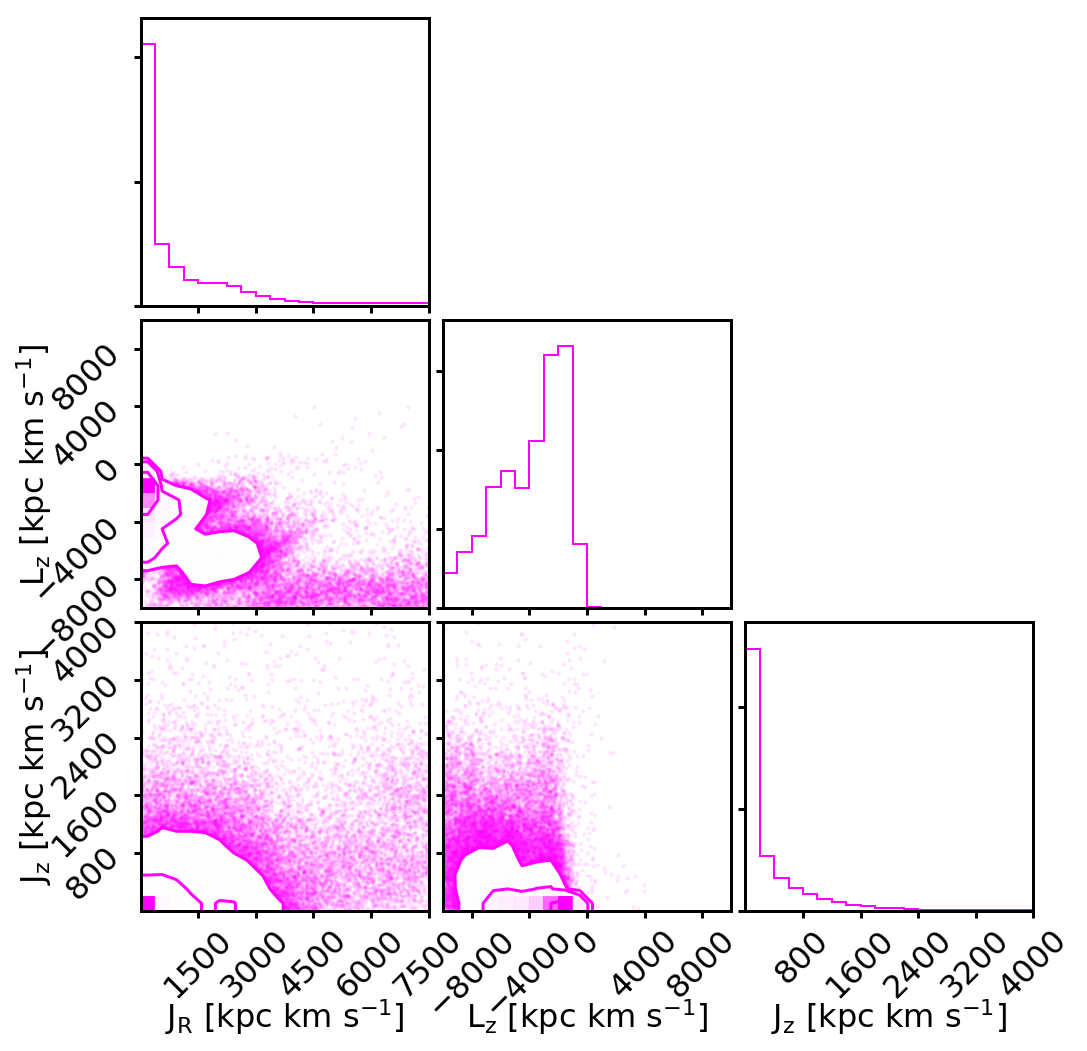

level   : 4
halo    : 24
snapnr  : 122
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1755643 stars.
Rotated pos.
Rotated vel.

galrad  : 0.023272740840911868
redshift: 0.058507322794512984
time    : 0.9447265771954694
center  : [ 0.  0.  0.]

Number of GCs: 84656.
Sum of normalizations after fitting potential parameters: 0.9994785396188146.
00:29:40.961434
0
00:30:01.833398
1000
00:30:22.791431
2000
00:30:43.698126
3000
00:31:04.653797
4000
00:31:25.676385
5000
00:31:39.087352
6000
00:31:39.961969
7000
00:31:40.934984
8000
00:31:41.931205
9000
00:31:49.119659
10000
00:31:53.467695
11000
00:32:02.252259
12000
00:32:06.399311
13000
00:32:19.835760
14000
00:32:32.040367
15000
00:32:52.999619
16000
00:33:13.895009
17000
00:33:34.806626
18000
00:33:55.708785
19000
00:34:16.717477
20000
00:34:37.670527
21000
00:34:58.694494
22000
00:35:19.612822
23000
00:35:40.47572

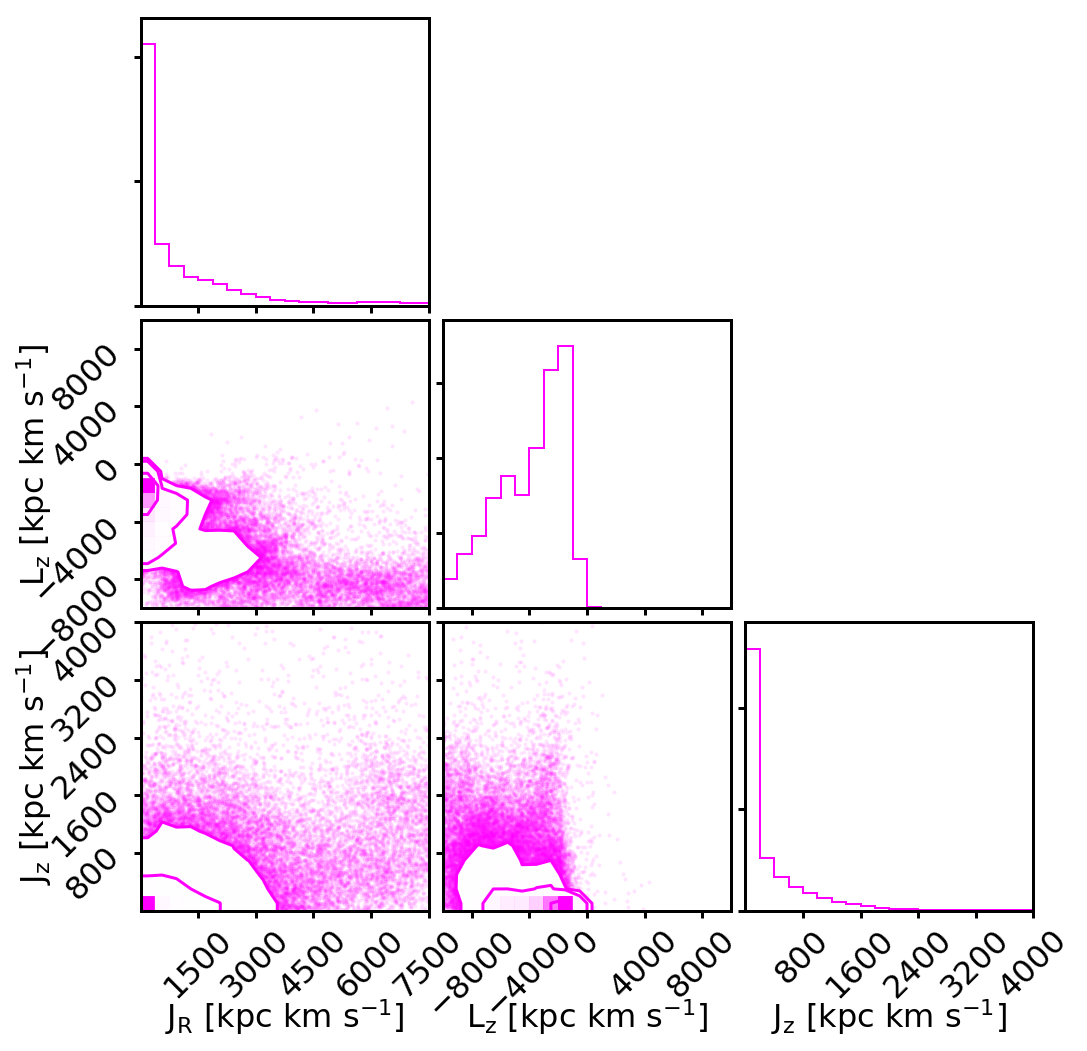

level   : 4
halo    : 24
snapnr  : 121
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1736454 stars.
Rotated pos.
Rotated vel.

galrad  : 0.023151549696922305
redshift: 0.07366138465643868
time    : 0.9313923498515226
center  : [ 0.  0.  0.]

Number of GCs: 84656.
Sum of normalizations after fitting potential parameters: 0.999495923603847.
00:50:47.448435
0
00:51:08.390672
1000
00:51:29.328673
2000
00:51:50.254216
3000
00:52:11.187462
4000
00:52:32.116931
5000
00:52:53.060053
6000
00:53:13.944830
7000
00:53:34.924230
8000
00:53:55.795304
9000
00:54:16.671822
10000
00:54:37.597812
11000
00:54:41.172283
12000
00:54:42.994733
13000
00:54:55.937510
14000
00:54:57.090937
15000
00:54:58.023533
16000
00:55:04.992668
17000
00:55:15.626776
18000
00:55:29.589141
19000
00:55:50.453422
20000
00:56:11.404609
21000
00:56:32.351153
22000
00:56:53.294811
23000
00:57:13.873767


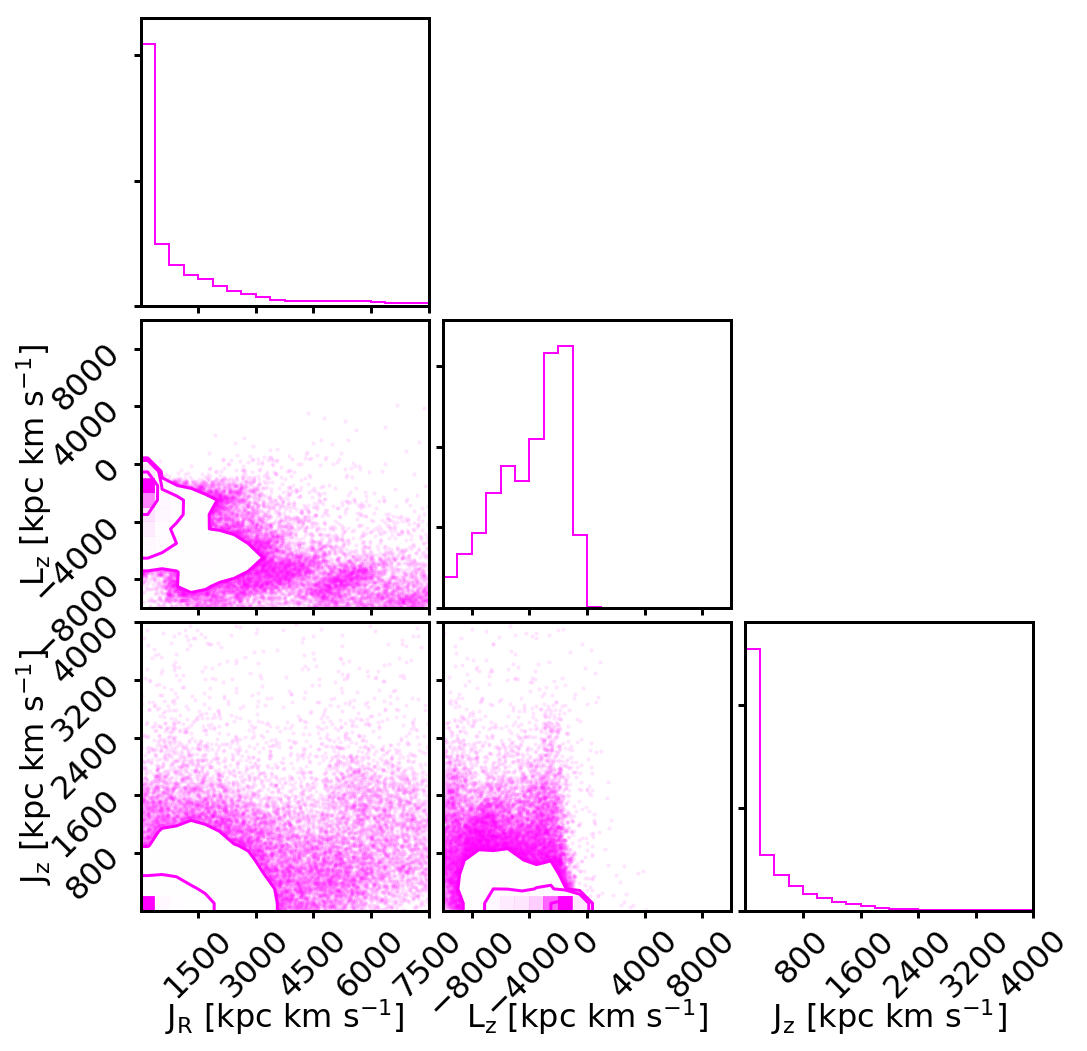

level   : 4
halo    : 24
snapnr  : 120
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1726323 stars.
Rotated pos.
Rotated vel.

galrad  : 0.023094923794269563
redshift: 0.08388443079747931
time    : 0.9226075876597282
center  : [ 0.  0.  0.]

Number of GCs: 84656.
Sum of normalizations after fitting potential parameters: 0.9992896726776703.
01:14:11.099254
0
01:14:32.025599
1000
01:14:52.993361
2000
01:15:14.013884
3000
01:15:35.032036
4000
01:15:55.900365
5000
01:16:16.851679
6000
01:16:37.730993
7000
01:16:58.676089
8000
01:17:19.584521
9000
01:17:40.587453
10000
01:18:01.509931
11000
01:18:10.615110
12000
01:18:24.877480
13000
01:18:39.256770
14000
01:18:50.998560
15000
01:19:11.955642
16000
01:19:32.880670
17000
01:19:53.850071
18000
01:20:14.828271
19000
01:20:35.713481
20000
01:20:56.592628
21000
01:21:17.600713
22000
01:21:38.502532
23000
01:21:59.385416

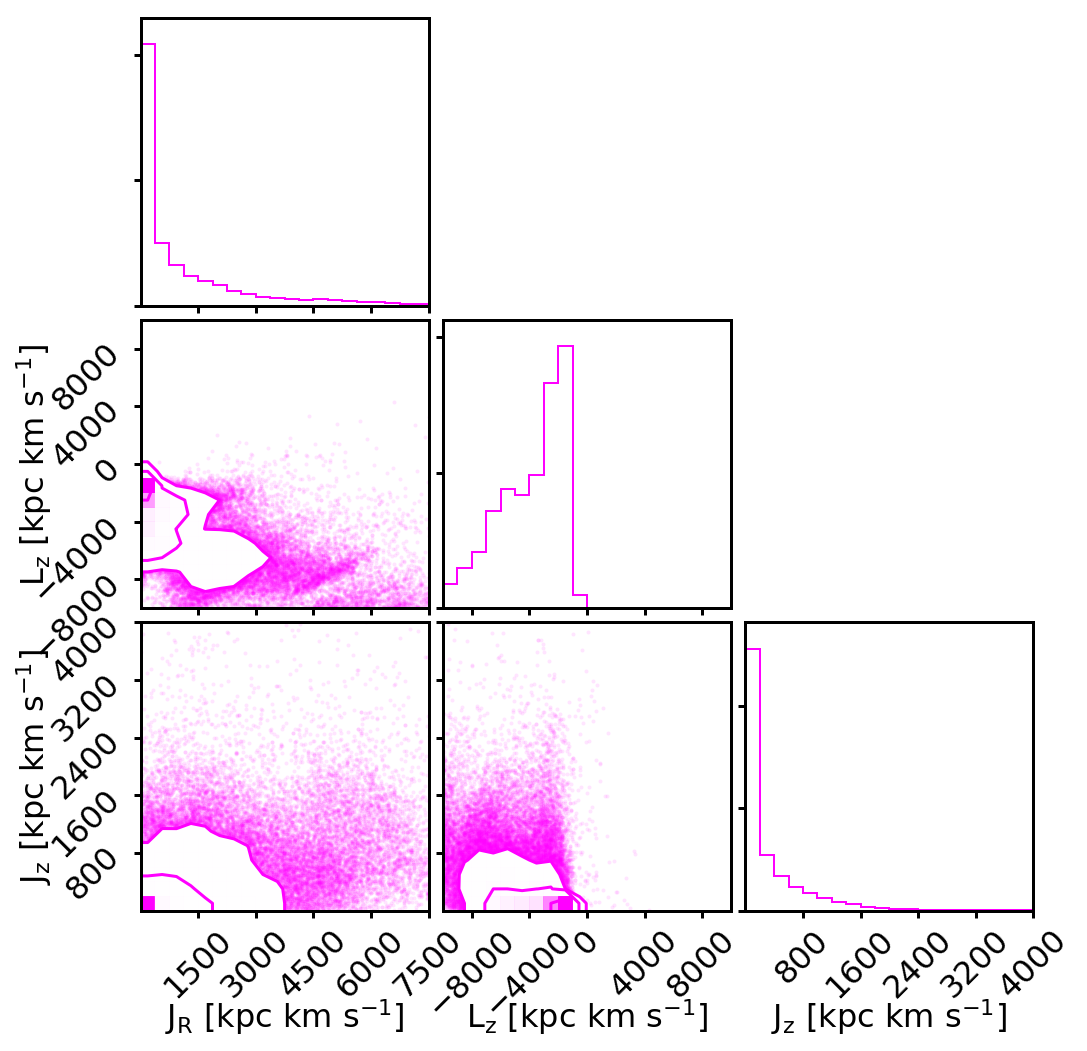

level   : 4
halo    : 24
snapnr  : 119
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1717424 stars.
Rotated pos.
Rotated vel.

galrad  : 0.023062470555305484
redshift: 0.09940180263022191
time    : 0.9095855560793044
center  : [ 0.  0.  0.]

Number of GCs: 84410.
Sum of normalizations after fitting potential parameters: 0.9987679372612039.
01:31:33.596206
0
01:31:34.462495
1000
01:31:35.273644
2000
01:31:36.090345
3000
01:31:36.900148
4000
01:31:37.711893
5000
01:31:38.525457
6000
01:31:39.334650
7000
01:31:40.141024
8000
01:31:40.952039
9000
01:31:41.760307
10000
01:31:42.569054
11000
01:31:44.183475
12000
01:31:44.999333
13000
01:31:45.806603
14000
01:31:46.617494
15000
01:31:47.508449
16000
01:31:48.320594
17000
01:31:49.134842
18000
01:31:49.949076
19000
01:31:50.768581
20000
01:31:51.591839
21000
01:31:52.404569
22000
01:31:53.214769
23000
01:31:54.028415

IndexError: index 84410 is out of bounds for axis 0 with size 84410

In [28]:
level = 4

startnr = 60
endnr   = 128

prognr = 2
IDs = np.loadtxt(filedir + 'merger_trees/progenitor{}_IDs'.format(prognr))

random_GCs = True
part_num = 100

for halo_number in [24]:  # range(1, 31):
    halodir = basedir+"halo_{0}/".format(halo_number)
    snappath = halodir+"output/"

    for snapnr in range(endnr-1, startnr-1, -1):
        i = snapnr - startnr
        print("level   : {0}".format(level))
        print("halo    : {0}".format(halo_number))
        print("snapnr  : {0}".format(snapnr))
        print("basedir : {0}".format(basedir))
        print("halodir : {0}".format(halodir))
        print("snappath: {0}\n".format(snappath))
        s, sf = eat_snap_and_fof(level, halo_number, snapnr, snappath, loadonlytype=[4], 
            haloid=0, galradfac=0.1, verbose=True) 

        # Clean negative and zero values of gmet to avoid RuntimeErrors
        # later on (e.g. dividing by zero)
        s.data['gmet'] = np.maximum( s.data['gmet'], 1e-40 )
        
        gcmask = np.isin(s.id, IDs)
        print('Number of GCs: {}.'.format(np.sum(gcmask)))

        print('Sum of normalizations after fitting potential parameters: {}.'.format(np.sum([n_MND[i], n_NFWH[i], n_HB[i]])))

        pot_galpy = setup_galpy_potential(a_MND_kpc_all[i], b_MND_kpc_all[i], a_NFWH_kpc_all[i], a_HB_kpc_all[i], n_MND[i], n_NFWH[i], n_HB[i], R0_kpc_all[i])

        # this would mean that there are no merged GCs
        if np.sum(gcmask) == 0:
            print("Skipped snap {} since there are no merged GCs.".format(snapnr))
            #continue
            
        
        # get position and velocities of all selected GCs & convert to galpy units
        (R_kpc, phi_rad, z_kpc), (vR_kms, vphi_kms, vz_kms) = get_cylindrical_vectors(s, sf, gcmask)
        # convert physical to galpy units by dividing by REF vals (get velocities from best fit parameters)
        fix_v0_kms = v0_kms_all[i]
        fix_R0_kpc = R0_kpc_all[i]
        R_galpy, vR_galpy, vT_galpy, z_galpy, vz_galpy = R_kpc / fix_R0_kpc, vR_kms / fix_v0_kms, vphi_kms / fix_v0_kms, z_kpc / fix_R0_kpc, vz_kms / fix_v0_kms

        # estimate Delta of the Staeckel potential
        delta = 0.45
        delta = estimateDeltaStaeckel(pot_galpy, R_galpy, z_galpy)
        # CHECK HOW BIG INFLUENCE OF DELTA IS


        # set up the actionAngleStaeckel object
        aAS = actionAngleStaeckel(
                pot   = pot_galpy,  # potential
                delta = delta,      # focal length of confocal coordinate system
                c     = True        # use C code (for speed)
                )

        jR_galpy, lz_galpy, jz_galpy, r_kpc = np.zeros(len(IDs)), np.zeros(len(IDs)), np.zeros(len(IDs)), np.zeros(len(IDs))
        savedIDs = np.zeros(len(IDs))
        IDs_notworking = []
        for test_i, item in enumerate(IDs):
            if (test_i % 1000) == 0:
                print(datetime.datetime.now().time())
                print(test_i)
            try: 
                jR_galpy[test_i], lz_galpy[test_i], jz_galpy[test_i] = aAS(R_galpy[test_i], vR_galpy[test_i], vT_galpy[test_i], z_galpy[test_i], vz_galpy[test_i])
                r_kpc[test_i] = np.sqrt(R_kpc[test_i]**2 + z_kpc[test_i]**2)
                savedIDs[test_i] = item
            except(ValueError, UnboundError):
                IDs_notworking.append(item)
                continue
 
        print('Number of GCs w/o actions:', len(IDs_notworking))
        jR_kpckms, lz_kpckms, jz_kpckms = jR_galpy * fix_R0_kpc * fix_v0_kms, lz_galpy * fix_R0_kpc * fix_v0_kms, jz_galpy * fix_R0_kpc * fix_v0_kms

        # just pick result values of particles of which I actually could calculate actions
        survivor_id_mask = np.isin(IDs, savedIDs)
        survivor_IDs = IDs[survivor_id_mask]
        jR_kpckms, lz_kpckms, jz_kpckms = jR_kpckms[survivor_id_mask], lz_kpckms[survivor_id_mask], jz_kpckms[survivor_id_mask]
        r_kpc = r_kpc[survivor_id_mask]

        save_data = ([survivor_IDs, r_kpc, jR_kpckms, lz_kpckms, jz_kpckms])
        np.savetxt(filedir + 'actions/progenitor2/actions_snap_{}_dec18.txt'.format(snapnr), save_data)

        data = np.vstack([jR_kpckms, lz_kpckms, jz_kpckms])
        labels = ['J$_\mathrm{R}$ [kpc km s$^{-1}$]', 'L$_\mathrm{z}$ [kpc km s$^{-1}$]', 'J$_\mathrm{z}$ [kpc km s$^{-1}$]']
        figure = corner.corner(data.transpose(), labels = labels, plot_contours = 1, color = 'fuchsia', range =  [(0.,7500.), (-10000.,10000.),(0., 4000.)])
        figure.savefig(plotdir + 'actions/right_potential/progenitor2/actions_snap_{}'.format(snapnr), dpi = 300, format = 'png', bbox_inches = 'tight')
        plt.show()